# Assignment 4: Correlation Analysis and Bootstrapping

## Objective

The field of statistics is divided into two major parts: descriptive and inferential. In this assignment, we will cover two important topics in statistics: correlation analysis and bootstrapping, where the former belongs to the descriptive part and the latter belongs to the inferential part. After this assignment, you will be able to answer the following questions:

1. How to visualize the relationship between two variables?  
2. What is Pearson's correlation? How to compute it?
3. What is Spearman's rank correlation? How to compute it?
4. What's the difference between Pearson's correlation and Spearman's rank correlation? 
5. How to estimate a population parameter based on a sample?
6. How to use the bootstrap to quantify the uncertainty of an estimated value?

**Requirements:**
* Use [pandas](https://pandas.pydata.org/) to manipulate data.
* Use [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org) to make plots.
* Please pay attention to visualization principles. 


The data can be downloaded from [A4-data.zip](A4-data.zip).


## Part 1. Correlation Analysis

As a data scientist, you often face this kind of question: "Are A and B correlated?" For example, 

* Do Canadian Currency and Oil Price move together?
* Do Vancouver Housing Price and US Stock Market have any correlation?
* Are GPA and Gender independent? 

To answer these questions, you need to conduct a correlation analysis. 

Imagine you are a data scientist working at a real-estate company. You download a property_tax_report from this [webpage](https://opendata.vancouver.ca/explore/dataset/property-tax-report/table/?refine.report_year=2021). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2021.  

You may think that for a newly built house, it tends to have a higher price than the ones built decades ago. In this assignment, your first job is to figure out whether YEAR_BUILT and HOUSE_PRICE are correlated. 

We first load the data as a DataFrame. 

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("A4-data/property-tax-report_2021.csv")


df['HOUSE_PRICE'] = df.apply(lambda x: (x['CURRENT_LAND_VALUE'] \
                                        +x['CURRENT_IMPROVEMENT_VALUE'])/1000000.0, axis = 1)

In [4]:
df.head()

,Unnamed: 0,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,HOUSE_PRICE
0,0,028-920-317,STRATA,640170030078,64017003,C-3A,Commercial,NaN,EPS984,302,...,236000.0,2021.0,231000.0,366000.0,2012.0,2012.0,NaN,13,2021,0.6020
1,1,013-935-178,LAND,144823280000,14482328,RS-1,One Family Dwelling,B,VAP2277,319,...,645000.0,2021.0,647000.0,1507000.0,2008.0,2008.0,NaN,12,2021,2.3160
2,2,027-303-756,STRATA,161599060186,16159906,CD-1 (415),Comprehensive Development,NaN,BCS2611,FC,...,230000.0,2021.0,227000.0,632000.0,2007.0,2007.0,NaN,26,2021,0.8960
3,3,015-330-265,LAND,634255510000,63425551,RT-4,Two Family Dwelling,147,VAP381,264A,...,76600.0,2021.0,77900.0,1715000.0,1924.0,1965.0,NaN,14,2021,1.8796
4,4,015-627-837,LAND,694228080000,69422808,RT-10,Two Family Dwelling,60,VAP187,301,...,NaN,NaN,NaN,NaN,1927.0,1998.0,NaN,15,2021,NaN


### Task A. Visualizations

Since the housing price varies a lot by locations, we will only consider the houses whose postcode starts with 'V6A'. Furthermore, we remove the houses that were built before 1900.

<img src="img/v6a.png" width="400">

In [269]:
df_V6A = df[df['PROPERTY_POSTAL_CODE'].str.contains("V6A", na=False)]
df_V6A = df_V6A[df_V6A['YEAR_BUILT'] >= 1900]

In the following, please make two subplots in one row. For the left subplot, it is a scatter plot with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`; for the right subplot, it is a hexbin plot (gridsize = 20) with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`.

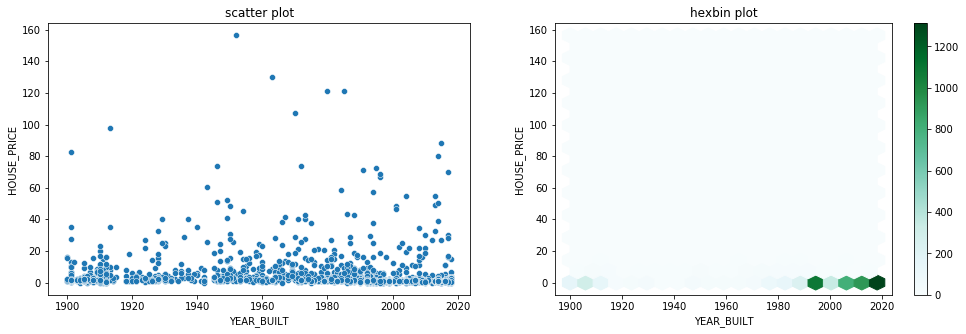

In [304]:
#<-- Write Your Code -->
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
ax.set_xlabel('YEAR_BUILT')
ax.set_ylabel('HOUSE_PRICE')
ax.set_title("scatter plot")
sns.scatterplot(data=df_V6A, x="YEAR_BUILT", y="HOUSE_PRICE", ax=axs[0])

ax = axs[1]
ax.set_title("hexbin plot")
ax.set_xlabel('YEAR_BUILT')
ax.set_ylabel('HOUSE_PRICE')
hb = df_V6A.plot.hexbin(x='YEAR_BUILT', y='HOUSE_PRICE', gridsize=20, ax=axs[1])

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. Many house's price are close to zero.
2. Doesn't seem to have a linear relatiionship between year built and house price

The above plots provide a general impression of the relationship between variables. There are some other visualizations that can provide more insights. One option is to bin one variable and plot percentiles of the other. 


In the following, please make three subplots in a row, where each subplot is a scatter plot with X = YEAR_BUILT and Y = HOUSE_PRICE. 
* The first subplot shows how the 25th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `25TH_HOUSE_PRICE`); 
* The second subplot shows how the 50th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `50TH_HOUSE_PRICE`); 
* The third subplot shows how the 75th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `75TH_HOUSE_PRICE`);  


/Users/zhangchao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


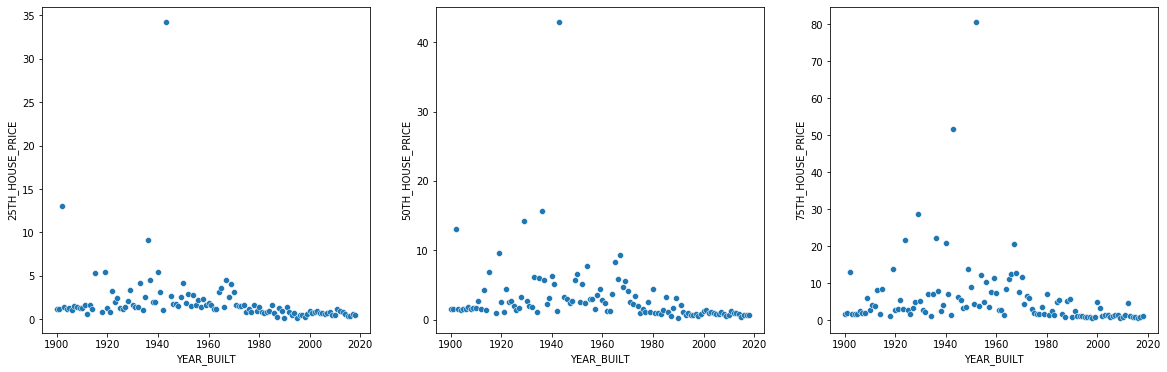

In [289]:
#<-- Write Your Code -->
df_year_price = df_V6A[["YEAR_BUILT", "HOUSE_PRICE"]]
dfcor = df_year_price.groupby('YEAR_BUILT').describe().stack(level=0)[['25%', '50%', '75%']]
dfcor.columns = ['25TH_HOUSE_PRICE', '50TH_HOUSE_PRICE', '75TH_HOUSE_PRICE']

fig, ax = plt.subplots(ncols=3,  figsize=(20, 6))
sns.scatterplot(data=dfcor, x="YEAR_BUILT", y="25TH_HOUSE_PRICE", ax=ax[0])
sns.scatterplot(data=dfcor, x="YEAR_BUILT", y="50TH_HOUSE_PRICE", ax=ax[1])
sns.scatterplot(data=dfcor, x="YEAR_BUILT", y="75TH_HOUSE_PRICE", ax=ax[2])
fig.show()

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. All three percentiles in the graph looks like a bell shape, start incresing from 1900 to 1950 and drop from 1950 to 2020.
2. Seems like the house price is pretty high between 1940 and 1960

### Task B. Correlation Coefficient

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between a pair of variables. 

In the following, please implement `calc_pearson()` and `calc_spearman()`, respectively. Note that you are *NOT* allowed to use [corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) from Pandas or [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)/[spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr) from scipy.stats to do this task. In other words, you need to implement the actual algorithms for pearson and spearman.

In [298]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
corr, _ = pearsonr(df_year_price.YEAR_BUILT.unique(), dfcor["50TH_HOUSE_PRICE"])
corr
coef, p = spearmanr(df_year_price.YEAR_BUILT.unique(), dfcor["50TH_HOUSE_PRICE"])
(corr, coef)

(-0.10822284555850334, 0.12366124629992697)

In [299]:
def calc_pearson(df, x, y):
    cov = np.cov(df_year_price[x].unique(), df[y])[0][1]
    year_std = np.std(df_year_price[x].unique())
    price_std = np.std(df[y])
    return cov / (year_std * price_std)
    
def calc_spearman(df, x, y):
    years = df_year_price[x].unique()
    prices = df[y].to_numpy()
    years_rank = calc_rank(years)
    prices_rank = calc_rank(prices)
    cov = np.cov(years_rank, prices_rank)[0][1]
    std_year = np.std(years_rank)
    std_price = np.std(prices_rank)
    return cov / (std_year * std_price)
    
def calc_rank(data):
    temp = data.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(data))
    return ranks


Then, you can use these two functions to compute the Pearson's correlation as well as Spearman's rank correlation for three pairs of variables: <`25TH_HOUSE_PRICE`, `YEAR_BUILT`>, <`50TH_HOUSE_PRICE`, `YEAR_BUILT`>, and <`75TH_HOUSE_PRICE`, `YEAR_BUILT`>. 

In [300]:
print(dfcor.head(10))
print()

for TH in ["25TH", "50TH", "75TH"]:
    print(TH+"_HOUSE_PRICE\t pearson=%f\t spearman=%f"  \
          %(calc_pearson(dfcor, "YEAR_BUILT", TH+"_HOUSE_PRICE"), \
            calc_spearman(dfcor, "YEAR_BUILT", TH+"_HOUSE_PRICE")))

                        25TH_HOUSE_PRICE  50TH_HOUSE_PRICE  75TH_HOUSE_PRICE
YEAR_BUILT                                                                  
1900.0     HOUSE_PRICE          1.212500           1.58465          1.743000
1901.0     HOUSE_PRICE          1.191825           1.57840          1.960075
1902.0     HOUSE_PRICE         13.056000          13.05600         13.056000
1903.0     HOUSE_PRICE          1.382600           1.47570          1.610300
1904.0     HOUSE_PRICE          1.204300           1.40400          1.701000
1905.0     HOUSE_PRICE          1.297000           1.58200          1.789000
1906.0     HOUSE_PRICE          1.113000           1.55275          2.383500
1907.0     HOUSE_PRICE          1.528800           1.76955          2.032750
1908.0     HOUSE_PRICE          1.407475           1.58920          1.873250
1909.0     HOUSE_PRICE          1.271175           1.66150          6.102225

25TH_HOUSE_PRICE	 pearson=-0.098037	 spearman=0.069356
50TH_HOUSE_PRICE	 pe

Please write down the **two** most interesting findings that you draw from the result.

 

**Findings**
1. Pearson's correlation and Spearman's rank correlation have different signs
2. Both methods suggest that year built and house price only has weak correlation.

## Part 2. Bootstrapping

In reality, it is more often than not that you can only collect a sample of the data. Whenever you derive a conclusion from a sample (e.g., Vancouver's housing price has increased by 10% since last year), you should ALWAYS ask yourself: **"CAN I TRUST IT?"**. In other words, you want to know that if the same analysis was conducted on the full data, would the same conclusion be derived? In Part 2, you will learn how to use bootstrapping to answer this question. 

In [268]:
df_sample = pd.read_csv("A4-data/property-tax-report_2021_sample.csv")

df_sample['CURRENT_PRICE'] = df_sample.apply(lambda x: x['CURRENT_LAND_VALUE'] \
                                             +x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df_sample['PREVIOUS_PRICE'] = df_sample.apply(lambda x: x['PREVIOUS_LAND_VALUE'] \
                                              +x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

df_sample = df_sample[df_sample['LEGAL_TYPE'] == 'STRATA']

### Task 1. Analysis Result Without Bootstrapping

Please compute the median of PREVIOUS_PRICE and CURRENT_PRICE, respectively, and compare them in a bar chart.

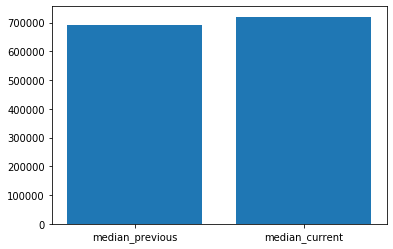

In [186]:
# --- Write your code below ---
median_previous = df_sample.PREVIOUS_PRICE.median()
median_current = df_sample.CURRENT_PRICE.median()

langs = ['median_previous', 'median_current']
students = [median_previous, median_current]
plt.bar(langs,students)
plt.show()

### Task 2. Analysis Result With Bootstrapping

From the above chart, we find that the median of PREVIOUS_PRICE is about 0.77 M, and the median of CURRENT_PRICE is about 0.72 M. Since the numbers were obtained from the sample, **"CAN WE TRUST THESE NUMBERS?"**

In the following, please implement the bootstrap by yourself, compute a 95%-confidence interval for each number, and add the confidence intervals to the above bar chart. [This document](./MIT18_05S14_Reading24.pdf) gives a good tutorial about the bootstrap. You can find the description of the algorithm in Section 7.

In [263]:
# --- Write your code below ---
nboot = 1000

previous_price = df_sample.PREVIOUS_PRICE.to_numpy()
previous_price = previous_price[~np.isnan(previous_price)]
previous_price_median = np.median(previous_price)

current_price = df_sample.CURRENT_PRICE.to_numpy()
current_price = current_price[~np.isnan(current_price)]
current_price_median = np.median(current_price)

sample_previous = np.random.choice(previous_price, len(previous_price) * nboot, replace=True)
sample_current = np.random.choice(current_price, len(current_price) * nboot, replace=True)

sample_previous = sample_previous.reshape(len(previous_price),nboot)
sample_current = sample_current.reshape(len(current_price),nboot)

In [264]:
bs_previous_median = np.median(sample_previous, axis = 0)
bs_current_median = np.median(sample_current, axis = 0)
delta_previous = bs_previous_median - previous_price_median
delta_current = bs_current_median - current_price_median
previous_quantile = np.quantile(delta_previous, [0.975, 0.025])
current_quantile = np.quantile(delta_current, [0.975, 0.025])

In [265]:
previous_ci = previous_price_median - previous_quantile
previous_ci

array([664000., 719000.])

In [266]:
current_ci = current_price_median - current_quantile
current_ci

array([689700. , 751737.5])

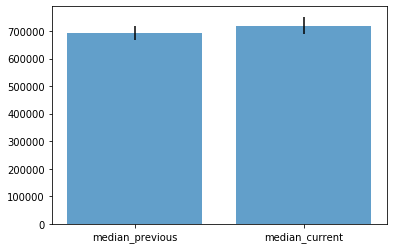

In [267]:
ci = [previous_ci, current_ci]
median_previous = df_sample.PREVIOUS_PRICE.median()
median_current = df_sample.CURRENT_PRICE.median()
medians = [median_previous, median_current]
y_r = [medians[i] - ci[i][1] for i in range(len(ci))]

langs = ['median_previous', 'median_current']
x = [median_previous, median_current]
plt.bar(langs,x, yerr=y_r, align='center', alpha=0.7)
plt.show()

## Submission

Complete the code in this notebook, and submit it to the CourSys activity Assignment 4.